# Sparse Hebbian Learning: plotting tools

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

In [3]:
from shl_scripts.shl_experiments import SHL

DEBUG_DOWNSCALE, verbose = 1, 0

In [4]:
help(SHL)

Help on class SHL in module shl_scripts.shl_experiments:

class SHL(builtins.object)
 |  Base class to define SHL experiments:
 |      - initialization
 |      - coding and learning
 |      - visualization
 |      - quantitative analysis
 |  
 |  Methods defined here:
 |  
 |  __init__(self, height=256, width=256, patch_size=(16, 16), datapath='/tmp/database/', name_database='kodakdb', n_dictionary=324, learning_algorithm='mp', fit_tol=None, do_precision=False, do_mask=True, l0_sparseness=15, n_iter=65536, eta=0.015, eta_homeo=0.01, nb_quant=128, C=5.0, do_sym=False, alpha_homeo=0.0, max_patches=4096, seed=42, patch_norm=True, batch_size=128, record_each=128, n_image=None, DEBUG_DOWNSCALE=1, verbose=0, data_cache='data_cache')
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  code(self, data, dico, coding_algorithm='mp', matname=None, fit_tol=None, l0_sparseness=None)
 |  
 |  decode(self, sparse_code, dico)
 |  
 |  get_data(self, matname=None)
 |  
 |  l

In [5]:
matname = 'vanilla'
shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, learning_algorithm='mp', verbose=verbose)
data = shl.get_data(matname=matname)

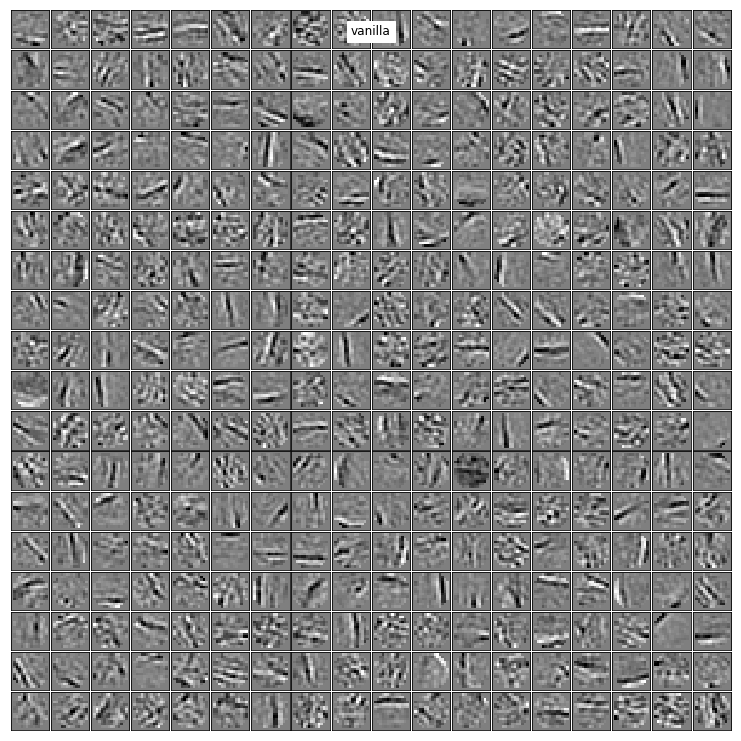

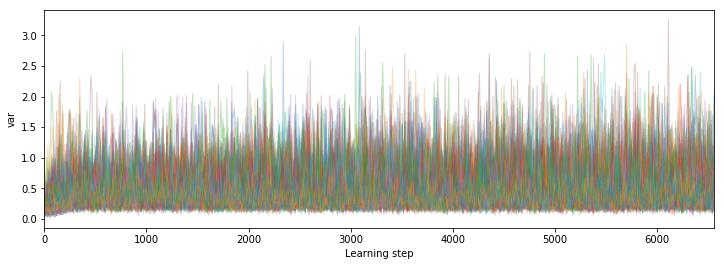

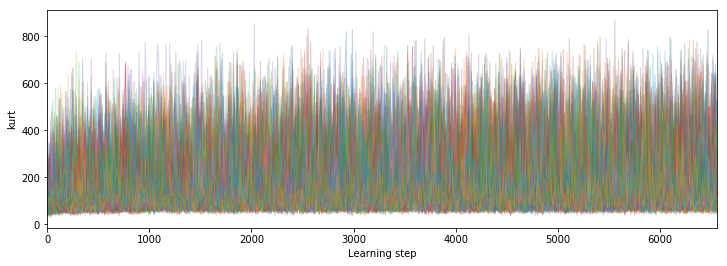

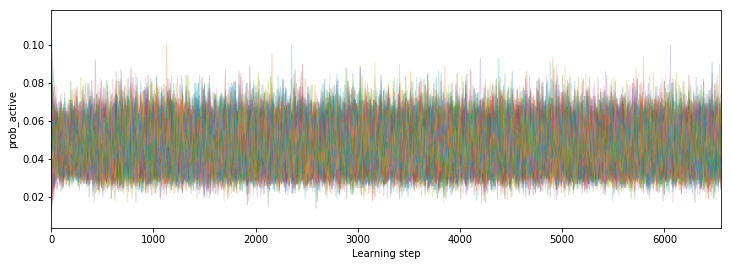

In [6]:
list_figures = ['show_dico',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']
dico = shl.learn_dico(matname=matname, list_figures=list_figures)

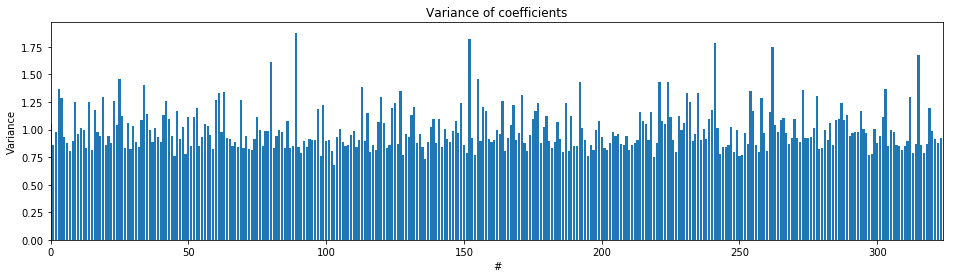

In [7]:
sparse_code = shl.code(data, dico, matname=matname)
shl.plot_variance(sparse_code);

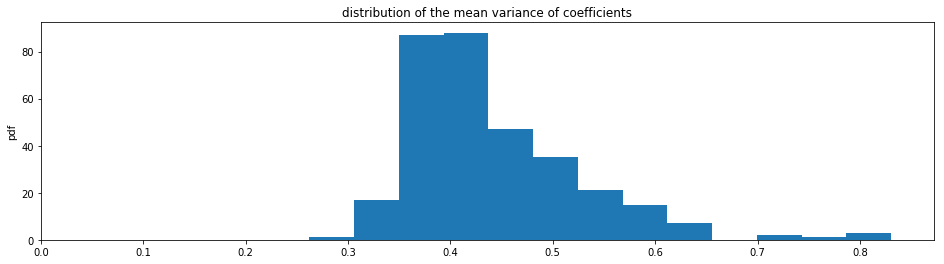

In [8]:
shl.plot_variance_histogram(sparse_code);

## Version used

In [9]:
%load_ext version_information
%version_information numpy, shl_scripts

Software versions
Python 3.6.3 64bit [GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.37)]
IPython 5.0.0
OS Darwin 17.2.0 x86_64 i386 64bit
numpy 1.13.3
shl_scripts 2017-02-09
Fri Dec 08 13:22:52 2017 CET